# Importing Libraries

In [1]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import pathlib
import glob
import random

# Tensorflow

In [36]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Sklearn

In [61]:
from sklearn.metrics import confusion_matrix

# Setup the GPU

In [3]:
tf.config.experimental.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data

In [6]:
dataset = 'Dataset/'

In [7]:
for dirpath, dirnames, filenames in os.walk(dataset):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Dataset/'.
There are 2 directories and 0 images in 'Dataset/test'.
There are 0 directories and 70 images in 'Dataset/test\cats'.
There are 0 directories and 70 images in 'Dataset/test\dogs'.
There are 2 directories and 0 images in 'Dataset/train'.
There are 0 directories and 279 images in 'Dataset/train\cats'.
There are 0 directories and 278 images in 'Dataset/train\dogs'.


In [8]:
num_of_cat_images = len(os.listdir('Dataset/train/cats/'))
num_of_cat_images

279

In [9]:
data_dir = pathlib.Path('Dataset/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cats' 'dogs']


In [10]:
image = cv2.imread('Dataset/train/cats/cat_10.jpg')
print(image.shape)

(1333, 2000, 3)


In [11]:
image_path = 'Dataset/train/'
img_file = os.listdir(image_path)
img_file

['cats', 'dogs']

# Converting images into Tensors

In [12]:
tf.random.set_seed(42)

In [13]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [14]:
train_dir = 'Dataset/train/'
test_dir = 'Dataset/test/'

In [15]:
train_data = train_gen.flow_from_directory(train_dir, batch_size=32, target_size=(224,224), class_mode='binary')
val_data = val_gen.flow_from_directory(test_dir, batch_size=32, target_size=(224,224), class_mode='binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [16]:
batch = train_data.next()

In [17]:
batch_size = 4

In [16]:
batch[0][0].shape

(224, 224, 3)

# Model building

In [20]:
model = Sequential()

model.add(Conv2D(16, 3, 1, activation='relu', input_shape=(224,224, 3)))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, 1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
18/18 [==============================] - 10s 224ms/step - loss: 0.8328 - accuracy: 0.4901 - val_loss: 0.6945 - val_accuracy: 0.4857
Epoch 2/20
18/18 [==============================] - 3s 161ms/step - loss: 0.6897 - accuracy: 0.5296 - val_loss: 0.6889 - val_accuracy: 0.5286
Epoch 3/20
18/18 [==============================] - 3s 149ms/step - loss: 0.6739 - accuracy: 0.5961 - val_loss: 0.6684 - val_accuracy: 0.6429
Epoch 4/20
18/18 [==============================] - 3s 156ms/step - loss: 0.6372 - accuracy: 0.6140 - val_loss: 0.6794 - val_accuracy: 0.5643
Epoch 5/20
18/18 [==============================] - 3s 147ms/step - loss: 0.5836 - accuracy: 0.7110 - val_loss: 0.6503 - val_accuracy: 0.6000
Epoch 6/20
18/18 [==============================] - 3s 146ms/step - loss: 0.5451 - accuracy: 0.7522 - val_loss: 0.6805 - val_accuracy: 0.6500
Epoch 7/20
18/18 [==============================] - 3s 161ms/step - loss: 0.4180 - accuracy: 0.8259 - val_loss: 0.6723 - val_accuracy: 0.6429
Epoch

# Plotting

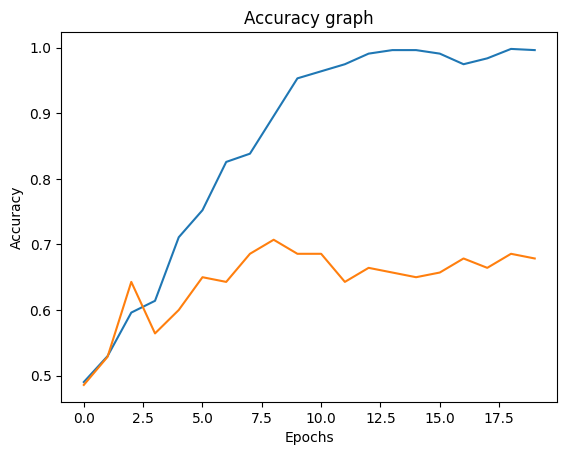

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

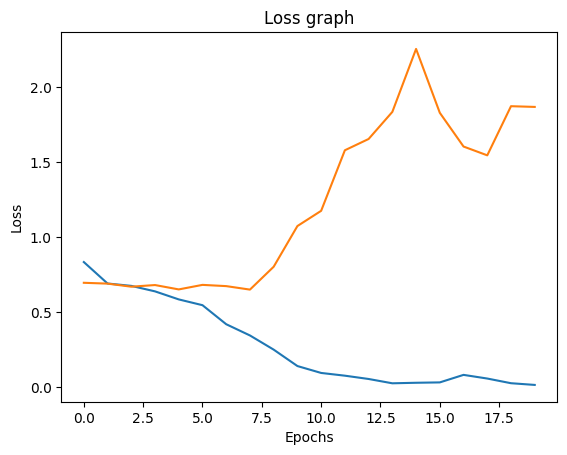

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Saving the model

In [28]:
model.save('Custom_cnn.h5')

In [32]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

# Loading the model for inference

In [37]:
model = load_model('Custom_cnn.h5')

In [54]:
def inference(path, model_path, target_size=(224,224)):
    model = load_model(model_path)
    img = image.load_img(path, target_size=target_size)
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)
    plt.imshow(img)
    predictions = model.predict(img_array)
    predictions_str = str(predictions)
    plt.title(predictions_str)
    plt.show()
    return predictions

1/1 [==============================] - 0s 71ms/step


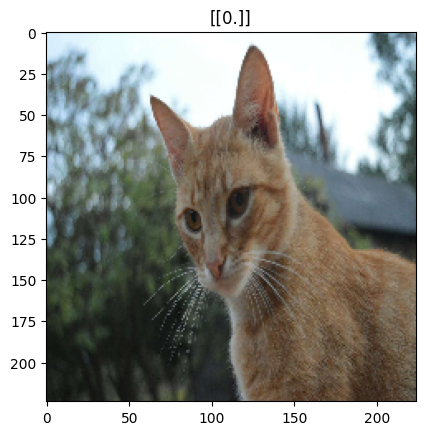

array([[0.]], dtype=float32)

In [58]:
inference('cat 2.jpg', 'Custom_cnn.h5')